In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action="ignore", category=DeprecationWarning)

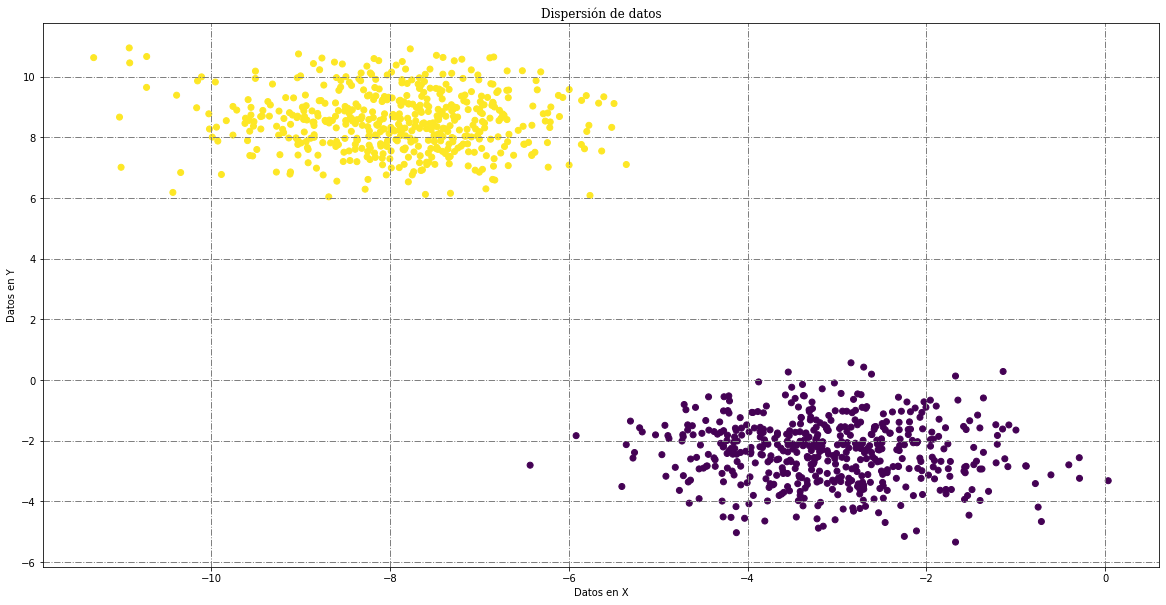

In [17]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.grid(True, color='gray', linestyle='-.', linewidth=1)
plt.gca().patch.set_facecolor('1')

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }

x, y = make_blobs(n_samples=1000, centers=2, n_features=2)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.title('Dispersión de datos', fontdict=font)
plt.xlabel('Datos en X')
plt.ylabel('Datos en Y')
plt.show()

In [18]:
def particionar(entradas, salidas, porcentaje_train, porcentaje_val, porcentaje_test):
    temp_size = porcentaje_val + porcentaje_test
    x_train, x_temp, y_train, y_temp = train_test_split(entradas, salidas, test_size = temp_size)
    
    if(porcentaje_val == 0):
        return[x_train, None, x_temp, y_train, None, y_temp]
    else:
        test_size = porcentaje_test / temp_size
        x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = test_size)
        
    return[x_train, x_val, x_test, y_train, y_val, y_test]

[x_train, x_val, x_test, y_train, y_val, y_test] = particionar(x, y, 0.6, 0.1, 0.3)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)


(600, 2)
(100, 2)
(300, 2)


In [19]:
import numpy as np
from sklearn.model_selection import KFold

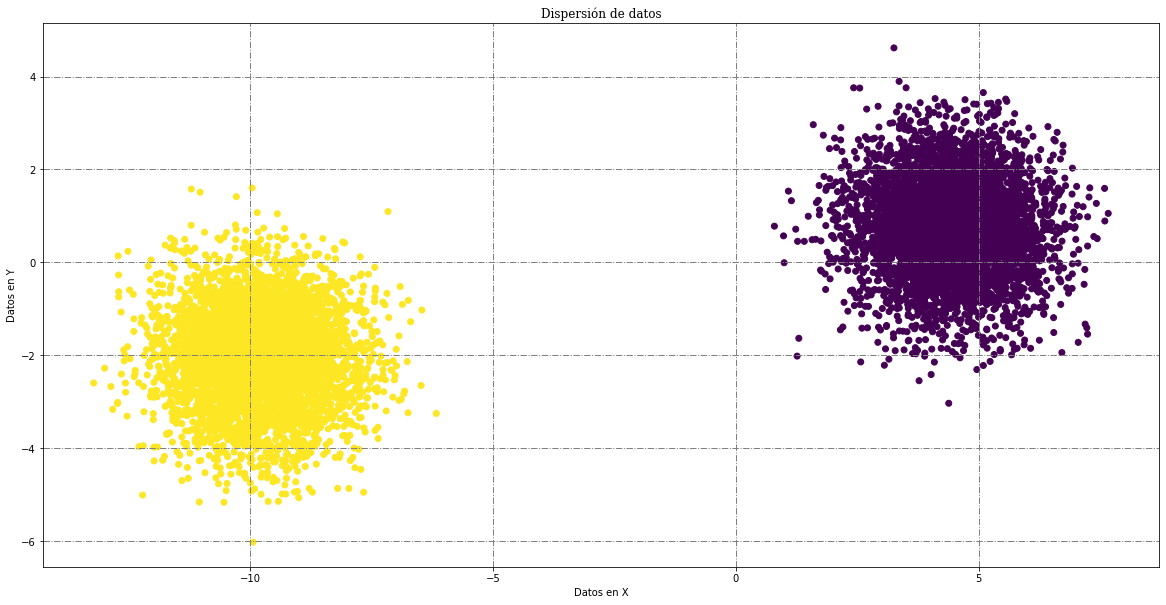

In [20]:
data_x, data_y = make_blobs(n_samples=10000, centers=2, n_features=2)

plt.grid(True, color='gray', linestyle='-.', linewidth=1)
plt.gca().patch.set_facecolor('1')

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }

plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y)
plt.title('Dispersión de datos', fontdict=font)
plt.xlabel('Datos en X')
plt.ylabel('Datos en Y')
plt.show()

In [21]:
# CV
K = 4
ramdom_seed = 48
aleatorio = True

kfold = KFold(K, aleatorio, ramdom_seed)
ciclo = 1
for indices_train, indices_test in kfold.split(data_x):
    print("Ciclo: " + str(ciclo))
    print("\t Datos para entrenamiento: " + str(data_x[indices_train]))
    print("\t Datos para prueba: " + str(data_x[indices_test]))
    ciclo += 1

Ciclo: 1
	 Datos para entrenamiento: [[-10.83347118  -3.013177  ]
 [  4.33370471   0.06528447]
 [ -8.35126689  -1.10938689]
 ...
 [  5.50370721   1.17560366]
 [  3.40818989   0.45001562]
 [  4.14222051   1.27417977]]
	 Datos para prueba: [[-10.01816868  -1.50414116]
 [-10.24534193  -3.16759816]
 [  4.02271502   1.52722094]
 ...
 [ -9.21015031  -2.49534791]
 [ -9.64133815  -3.84359836]
 [  5.16798329   0.5106556 ]]
Ciclo: 2
	 Datos para entrenamiento: [[-10.01816868  -1.50414116]
 [-10.24534193  -3.16759816]
 [  4.02271502   1.52722094]
 ...
 [  2.46081171   1.3937492 ]
 [  4.68296092   2.07550543]
 [  4.14222051   1.27417977]]
	 Datos para prueba: [[-10.83347118  -3.013177  ]
 [ -8.35126689  -1.10938689]
 [ -9.29643083  -1.48063479]
 ...
 [  5.78986644  -0.87716474]
 [  5.50370721   1.17560366]
 [  3.40818989   0.45001562]]
Ciclo: 3
	 Datos para entrenamiento: [[-10.83347118  -3.013177  ]
 [-10.01816868  -1.50414116]
 [-10.24534193  -3.16759816]
 ...
 [  4.68296092   2.07550543]
 [  5.

In [22]:
# LOOCV
K = data.shape[0]
random_seed = 48
aleatorio = True

kfold = KFold(K, aleatorio, ramdom_seed)
ciclo = 1
for indices_train, indices_test in kfold.split(data_x):
    print("Ciclo: " + str(ciclo))
    print("\t Datos para entrenamiento: " + str(data_x[indices_train]))
    print("\t Datos para prueba: " + str(data_x[indices_test]))
    ciclo += 1

NameError: name 'data' is not defined

In [23]:
# Matriz de confusión
import numpy as np
from sklearn.metrics import confusion_matrix

In [24]:
y_esperados = np.array([1,1,1,1,0,0,0,0])
y_predichos = np.array([1,0,1,0,1,0,0,0])

In [25]:
def eval_modelo(y_esperados, y_predichos, debug=0):
    resultado = confusion_matrix(y_esperados, y_predichos)
    
    (TN, FP, FN, TP) = resultado.ravel()
    if(debug == 1):
        print(resultado)
        print("True positives: " + str(TP))
        print("True negatives: " + str(TN))
        print("False positives: " + str(FP))
        print("False negatives: " + str(FN))
    
    acc = (TP+TN)/(TN+FP+FN+TP)
    sensibilidad = TP/(TP+FN)
    especificidad = TN/(TN+FP)
    
    return[acc, sensibilidad, especificidad]

In [26]:
(acc, sensibilidad, especificidad) = eval_modelo(y_esperados, y_predichos)

print("Acc: " + str(acc))
print("Sensibilidad: " + str(sensibilidad))
print("Especificidad: " + str(especificidad))

Acc: 0.625
Sensibilidad: 0.5
Especificidad: 0.75
